<a href="https://colab.research.google.com/github/Disha-codes29/Data_analytics_project/blob/main/Machine_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


# **Load the data**

In [ ]:
from google.colab import files
uploaded=files.upload

In [ ]:
df = pd.read_csv("/content/machine_predict_data.csv")

# **Exploring the dataset**

In [ ]:
df.head(1000)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


In [ ]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


# **Clean and processes the data**

In [ ]:
df.fillna(df.mean(),inplace=True)

In [ ]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df.drop('fail',axis=1))

# **Building a predictive model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Split Data

x = df.drop('fail',axis=1)
y =df['fail']
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=40)

In [ ]:
# Train model

model = RandomForestClassifier()
model.fit(x_train , y_train)

RandomForestClassifier()

In [ ]:
# Evaluate

y_pred = model.predict(x_test)
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))

[[100   8]
 [ 11  70]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       108
           1       0.90      0.86      0.88        81

    accuracy                           0.90       189
   macro avg       0.90      0.90      0.90       189
weighted avg       0.90      0.90      0.90       189



# **Visualize Insights**

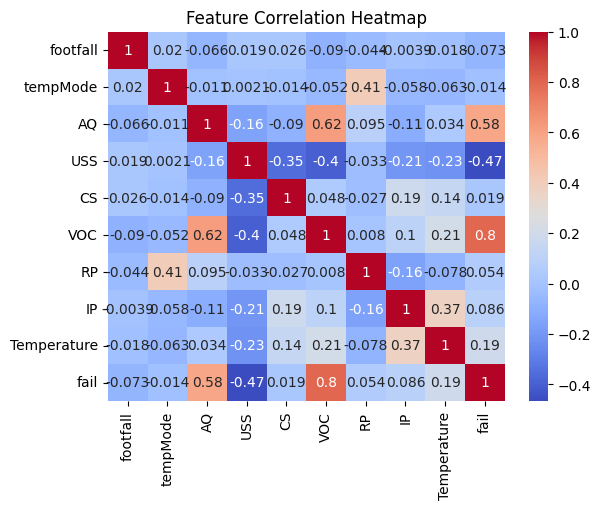

In [ ]:
# correlation heatmap

sns.heatmap(df.corr(), annot=True , cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()